<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Shironin-Igor-branch/Shironin%20Igor/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%90%D1%83%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки

In [1]:
from PIL import Image, ImageEnhance       # Инструменты для работы с изображениями
import matplotlib.pyplot as plt           # Отрисовка графиков
import numpy as np                        # Работа с массивами
import random                             # Генерация случайных чисел
import math                               # Математические функции
# Для работы с файлами
import os


%matplotlib inline

# Загрузка изображений

In [2]:
# Подключение модуля для загрузки данных из облака
import gdown
# открываем доступ к файлу и получаем ссылку
# https://drive.google.com/file/d/1NbT75UsIcdKlg9V4z1X2jxdTD_gzuBag/view?usp=sharing

f_1 = '1NbT75UsIcdKlg9V4z1X2jxdTD_gzuBag'# нужна только эта часть ссылки
gdown.download(f'https://drive.google.com/uc?id={f_1}', None, quiet=True)

'датасет атрибуты 94 файла.zip'

In [3]:
# Разархивация датасета в директорию '/content/Foto/'
!unzip -qo "датасет атрибуты 94 файла.zip" -d /content/Foto


In [4]:
# Папка с папками картинок
IMAGE_PATH = '/content/Foto/датасет атрибуты/'


# Получение списка файлов - files и списка путей к ним -files_paths

In [5]:
import os

# Получаем список файлов в директории
files = os.listdir(IMAGE_PATH)

# Составляем список путей к файлам
files_paths = [os.path.join(IMAGE_PATH, file) for file in files]

# Выводим список путей к файлам и их названия
i=0
for path in files_paths:
    print(i,'',files[i],'',path)
    i+=1
print(len(files))
print(len(files_paths))
print(files[0])
# Image.open( files_paths[0])

0  102.jpg  /content/Foto/датасет атрибуты/102.jpg
1  50.jpg  /content/Foto/датасет атрибуты/50.jpg
2  83.jpg  /content/Foto/датасет атрибуты/83.jpg
3  IMG20230615180209.jpg  /content/Foto/датасет атрибуты/IMG20230615180209.jpg
4  82.jpg  /content/Foto/датасет атрибуты/82.jpg
5  104.jpg  /content/Foto/датасет атрибуты/104.jpg
6  47.jpg  /content/Foto/датасет атрибуты/47.jpg
7  51.jpg  /content/Foto/датасет атрибуты/51.jpg
8  42.jpg  /content/Foto/датасет атрибуты/42.jpg
9  6.jpg  /content/Foto/датасет атрибуты/6.jpg
10  64.jpg  /content/Foto/датасет атрибуты/64.jpg
11  48.jpg  /content/Foto/датасет атрибуты/48.jpg
12  27.jpg  /content/Foto/датасет атрибуты/27.jpg
13  87.jpg  /content/Foto/датасет атрибуты/87.jpg
14  96.jpg  /content/Foto/датасет атрибуты/96.jpg
15  71.jpg  /content/Foto/датасет атрибуты/71.jpg
16  63.jpg  /content/Foto/датасет атрибуты/63.jpg
17  54.jpg  /content/Foto/датасет атрибуты/54.jpg
18  38.jpg  /content/Foto/датасет атрибуты/38.jpg
19  101.jpg  /content/Foto/д

# получение списка файлов data_img c размерностью 640x640

In [6]:
data_img = []
for i in range(len(files_paths)):
  img_old  = Image.open( files_paths[i])
  img = img_old.resize((640,640))
  data_img +=[img]

In [7]:
# Просмотр изображений

In [8]:
# # Всего 94 файла . Отображаем по 5.
# # в конце получим ошибку т.к. одного файла не хватит
# # Этот блок необязателен поэтому закоментирован
# for j in range(0,len(files_paths)-3,5):
#   fig, axs = plt.subplots(1, 5, figsize=(10,10))
#   print(j)

#   for i in range(5):


#     # Отображение фото
#      axs[i].set_title(f'{data_img[i+j].size},{i+j}')
#      axs[i].imshow(data_img[i+j])
#      axs[i].axis('off')

# # Отрисовка всего полотна
#   plt.show()

# функция для визуального сравнения исходного изображения с измененным:

In [9]:
def show_image_pair(img1, img2):
    # Cоздание полотна для рисования двух изображений
    fig, axs = plt.subplots(1, 2, figsize=(4, 2))
    # Исходное изображение
    axs[0].imshow(img1)
    axs[0].axis('off')
    # Модифицированное изображение
    axs[1].imshow(img2)
    axs[1].axis('off')
    # Вывод изображений
    plt.show()

# Вращение: .rotate()

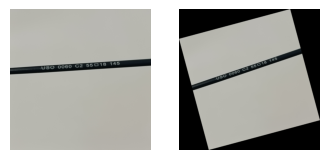

(784, 784)

In [10]:
angle = 15 # угол поворота БОЛЬШИЙ УГОЛ ЛУЧШЕ НЕ БРАТЬ
img1 = data_img[1]
img2 = img1.rotate(angle, expand=True)

# Вывод картинки
show_image_pair(img1, img2)
# Вывод размеров результата
img2.size

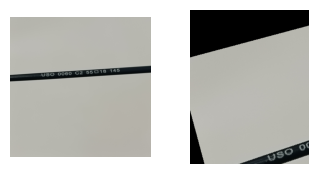

(784, 784)

In [11]:
# Обрезка: .сrop()
# Функция имеет следующие аргументы:
# box - кортеж из четырех значений
# (left, upper, right, lower)
# координаты левого верхнего и правого нижнего углов рамки для обрезки.

img3 = img2.crop((30, 50, 300, 400))

# Вывод картинки
show_image_pair(img1, img3)

# Вывод размеров результата
img2.size

In [12]:
# подрезка изображения чтобы небыло черных углов
def rotated_rect(w,                       # Ширина изображения
                 h,                       # Высота изображения
                 angle                    # Угол поворота в градусах
                 ):
    angle = math.radians(angle)
    width_is_longer = w >= h
    side_long, side_short = (w,h) if width_is_longer else (h,w)

    sin_a, cos_a = abs(math.sin(angle)), abs(math.cos(angle))

    if side_short <= 2.*sin_a*cos_a*side_long or abs(sin_a-cos_a) < 1e-10:
        x = 0.5 * side_short
        wr, hr = (x/sin_a, x/cos_a) if width_is_longer else (x/cos_a, x/sin_a)
    else:
        cos_2a = cos_a*cos_a - sin_a*sin_a
        wr, hr = (w*cos_a - h*sin_a)/cos_2a, (h*cos_a - w*sin_a)/cos_2a

    return wr, hr # Ширина и Высота прямоугольника обрезки

 исходное изображение : Ширина = 640,Высота = 640
Градус поворота = 15 градусов
 полученное изображение : Ширина = 522,Высота = 522


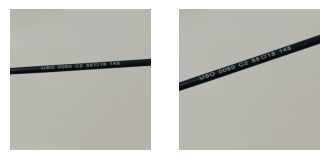

(640, 640)

In [13]:
print( f' исходное изображение : Ширина = {img1.width},Высота = {img1.height}')
print(f'Градус поворота = {angle} градусов')

# Вычисление размеров прямоугольника обрезки максимальной площади
crop_w, crop_h = rotated_rect(img1.width, img1.height, angle)
img2 = img1.rotate(angle, expand=True)
# Обрезка повернутого изображения
w, h = img2.size
img_rot_crop = img2.crop(((w - crop_w)*0.5, (h - crop_h)*0.5,
                             (w + crop_w)*0.5, (h + crop_h)*0.5))

print( f' полученное изображение : Ширина = {img_rot_crop.width},Высота = {img_rot_crop.height}')
# Вывод картинки
img_rot_crop = img_rot_crop.resize((640,640))
show_image_pair(img1, img_rot_crop)
img_rot_crop.size

In [14]:
 # функция поворота на случайный угол (в градусах) с учетом необходимой обрезки
 # + востановление размеров
def random_rot(x,                         # Подаваемое изображение
               ang                        # Максимальный угол поворота
               ):


    # Случайное значение угла в диапазоне [-ang, ang]
  a = random.uniform(-1., 1.) * ang

    # Вращение картинки с расширением рамки
  r = x.rotate(a, expand=True)

    # Вычисление размеров прямоугольника обрезки максимальной площади
    # для размеров исходной картинки и угла поворота в градусах
  crop_w, crop_h = rotated_rect(x.width, x.height, a)

    # Обрезка повернутого изображения и возврат результата
  w, h = r.size
  y = r.crop(((w - crop_w)*0.5, (h - crop_h)*0.5,
                   (w + crop_w)*0.5, (h + crop_h)*0.5))
  y = y.resize((x.width,x.height))
  return y

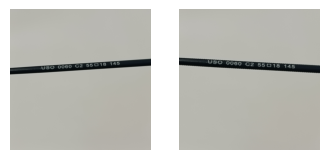

(640, 640)

In [15]:
img2 = random_rot(img1, 15) # больше 15 угол лучше не ставить
# Вывод картинок
show_image_pair(img1, img2)
# Вывод размеров результата
img2.size

# Изменение контрастности: Contrast

In [16]:
from PIL import ImageEnhance
# Модуль ImageEnhance содержит дополнительные инструменты для манипуляций с изображениями.
# В частности, в нем есть класс Contrast, который отвечает за контрастность изображения.

# Для вычисления результата необходимо создать экземпляр класса
# и применить функцию-метод .enhance(),
# указав в скобках один обязательный аргумент - коэффициент усиления,
# где 0. - сплошное серое изображение, а 1. - исходное изображение:

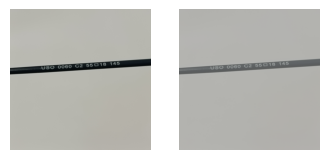

(640, 640)


(640, 640)

In [17]:
enh = ImageEnhance.Contrast(img1)         # Создание экземпляра класса Contrast
img2 = enh.enhance(0.5)              # Изменение коэффициента контраста + 50 %
# Вывод картинки
show_image_pair(img1, img2)
# Вывод размеров результата
print(img1.size)
img2.size

In [18]:
def random_contrast(x,                    # Подаваемое изображение
                    level                 # Максимальное отклонение коэффициента контраста от нормы - число от 0. до 1.
                    ):

    enh = ImageEnhance.Contrast(x)        # Создание экземпляра класса Contrast
    factor = random.uniform(1. - level,
                            1. + level)   # Cлучайный коэффициент контраста из указанного интервала

    return enh.enhance(factor)            # Изменение коэффициента контраста

# Изменение яркости: Brightness

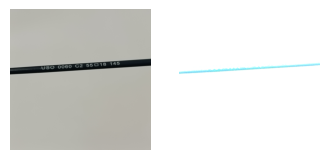

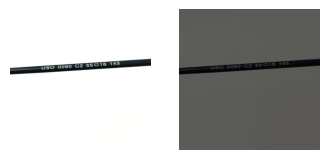

In [19]:
# Для вычисления результата необходимо создать экземпляр класса и применить функцию-метод .enhance()
#, указав в скобках один обязательный аргумент - коэффициент усиления,
#Коэффициент усиления для яркости (Brightness) может находиться в диапазоне от 0 до 100,
# где 0 – минимальное значение (полностью поглощенный свет)
# и 100 – максимальное значение (максимальная яркость).
enh = ImageEnhance.Brightness(img1)
img2 = enh.enhance(20)
img3 = enh.enhance(1.5) # + 50% яркости
img4 = enh.enhance(0.5) # - 50% яркости
# Вывод картинки
show_image_pair(img1, img2)
show_image_pair(img3, img4)

In [20]:
def random_brightness(x,                  # Подаваемое изображение
                      level               # Максимальное отклонение коэффициента яркости от нормы - число от 0. до 1.
                      ):

    enh = ImageEnhance.Brightness(x)      # Создание экземпляра класса Brightness
    factor = random.uniform(1. - level,
                            1. + level)   # Cлучайный коэффициент контраста из указанного интервала

    return enh.enhance(factor)

# Аугментация

In [21]:
# Для нашего случая возьмем угол поворота от -15 до 15 градусов
# Изменение Яркости и Контрастности от 0.5 до 1.5
def img_aug(img_new):


# Последовательное применение случайных изменений исходного изображения
 img_new = random_rot(img_new, 15)

 img_new = random_brightness(img_new, 0.5)
 img_new = random_contrast(img_new, 0.5)

 return img_new


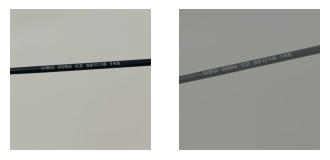

(640, 640)


(640, 640)

In [22]:
img2 = img_aug(img1)
# Вывод картинки
show_image_pair(img1, img2)
# Вывод размеров результата
print(img1.size)
img2.size

In [23]:
# функция для получения списка из n аугментированых изображений + родное
# со списком одинаковых меток например a ='50.jpg'

def aug_list(img, n, a):
  img_list = [img]
  a_list = [a]
  for i in range(n):
    img_list += [img_aug(img)]
    a_list+=[a]
  return img_list , a_list


In [24]:
# применим
img_list , a_list = aug_list(img1,19,files[1])

50.jpg


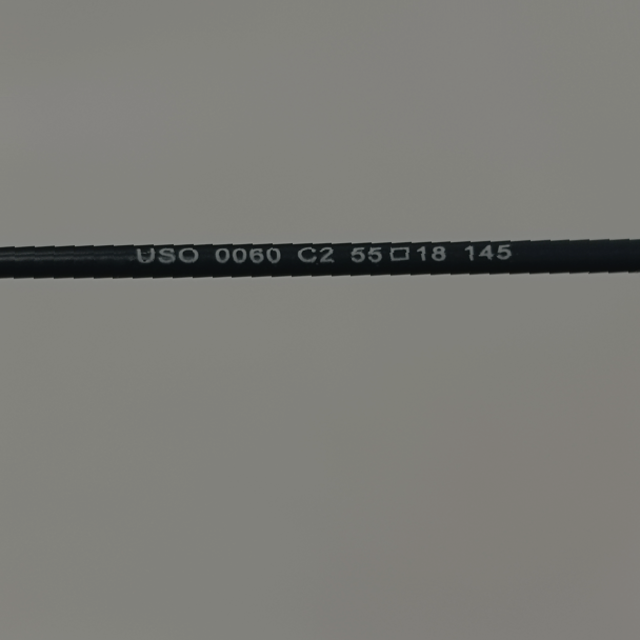

In [25]:
print(a_list[1])
img_list[1]


In [28]:
# функция для отображения n изображений из списка длины n кратной 5
def img_n5 (list_img, list_a):
  for j in range(0,len(list_img),5):
    fig, axs = plt.subplots(1, 5, figsize=(10,10))
    for i in range(5):
      # Отображение фото
      axs[i].set_title(f'{list_img[i+j].size},{list_a[i+j]}')
      axs[i].imshow(list_img[i+j])
      axs[i].axis('off')

# Отрисовка всего полотна
  plt.show()




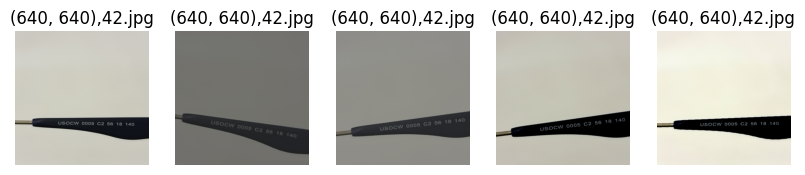

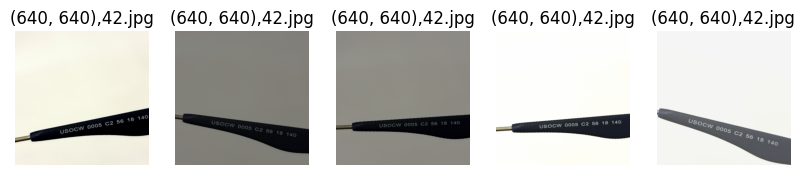

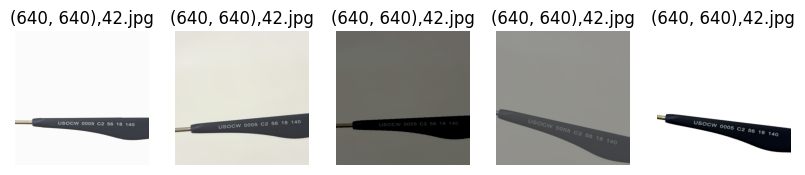

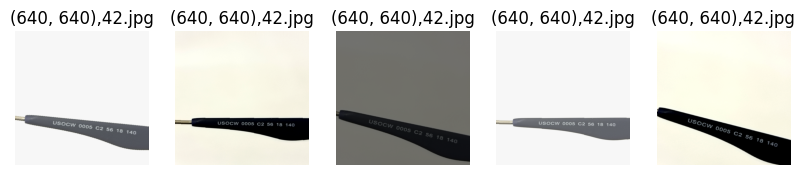

In [29]:
list_img ,list_a = aug_list(data_img[8],19,files[8])
img_n5(list_img, list_a)

# Получение аугментированного списка файлов и меток соответствующих названию файла для всех изображений

In [35]:
data_x = []
data_y = []
n = 30
for i in range(len(data_img )):
  list_img ,list_a = aug_list(data_img[i],n-1,files[i])
  for j in range(len(list_img )):
    data_x += [list_img[j]]
    data_y += [list_a[j]]
print(len(data_x))
print(len(data_y))




2820
2820


92.jpg


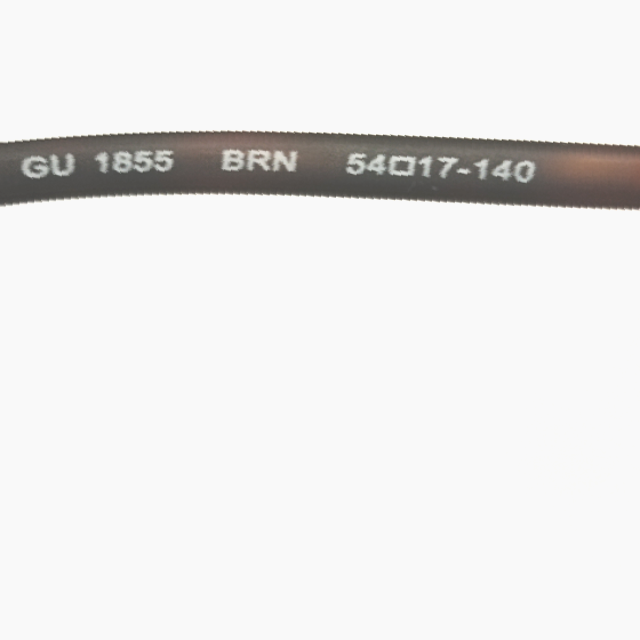

In [38]:
print(data_y[1000])
data_x[1000]